In [1]:
import os
import json

v1 = json.load(open('./sentence vectors/vectors.json'))
v2 = json.load(open('./sentence vectors/new_vectors.json'))

In [3]:
c1 = json.load(open('./sentence vectors/classes.json'))
c2 = json.load(open('./sentence vectors/classes_bert.json'))

In [143]:
ex=json.load(open('./sentence vectors/extracts.json'))

In [136]:
s[1][30]

' While both were nominated for the Tony Award for Best Leading Actor in a Musical , Butz won over Lithgow.'

In [25]:
import umap 
from time import time

import itertools
def umap_vectors(vectors):
    t0 = time()
    fit_data = list(itertools.chain(*vectors))

    fit = umap.UMAP(n_neighbors=15, random_state=42, n_components=2, metric='cosine')
    u = fit.fit(fit_data)
    print("UMAP fit took %0.2f sec" % (time() - t0))

    t0 = time()
    new_vectors = []
    for ext in vectors:
        if len(ext) > 0:
            new_ext = u.transform(ext)
        else:
            new_ext = ext
        new_vectors.append(new_ext)
    print("UMAP transform took %0.2f sec" % (time() - t0))
    
    return new_vectors


In [26]:
v1_umap=umap_vectors(v1)

UMAP fit took 4.97 sec
UMAP transform took 1.02 sec


In [27]:
v2_umap=umap_vectors(v2)

UMAP fit took 4.81 sec
UMAP transform took 1.41 sec


In [47]:
for v,c in zip(v1_umap,c1):
    if len(v)==0:
        v1_umap.remove(v)
        c1.remove(c)
 

/Users/wweschen/UMAP_expriments/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


In [144]:
for x in ex:
    if len(x)==0:
        ex.remove(x) 

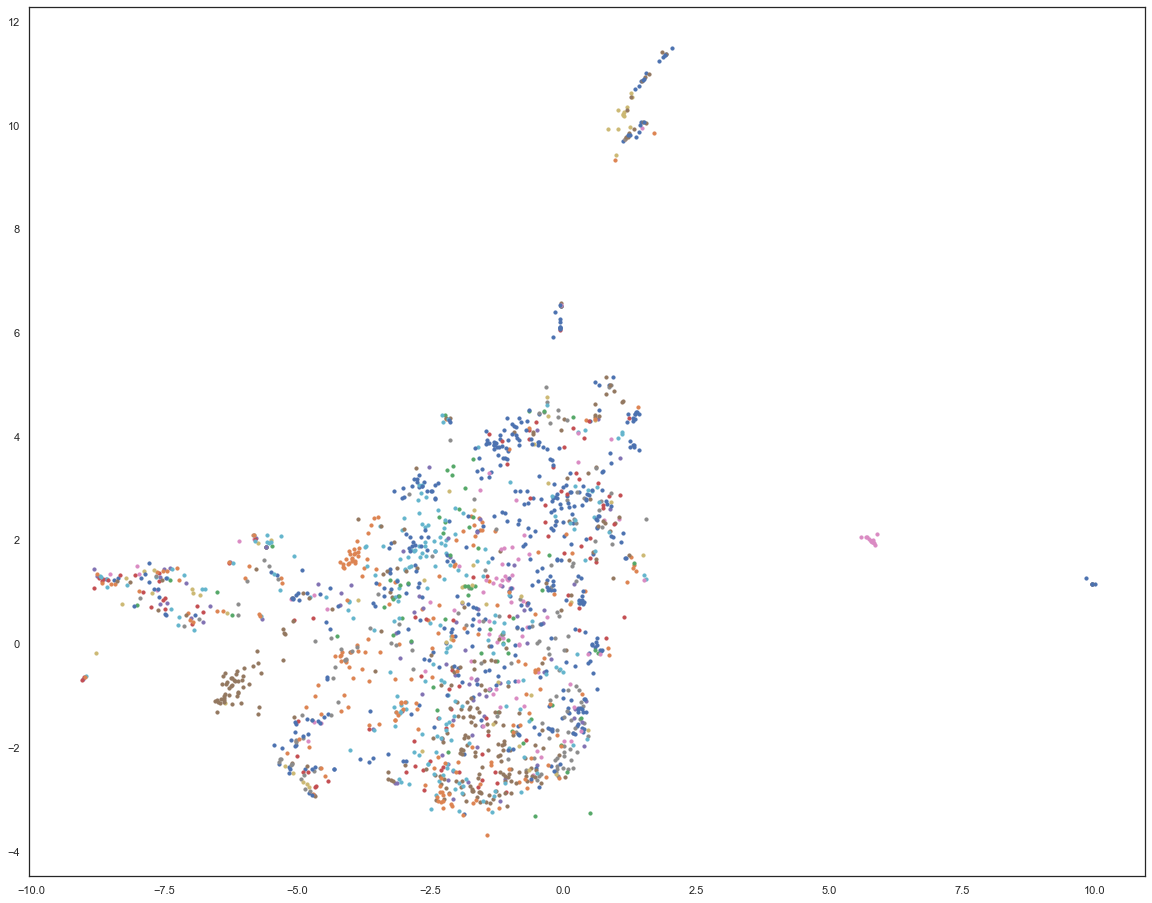

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(20,16)})
 
for i in range(43):
    plt.scatter(v2_umap[i][:,0],v2_umap[i][:,1],s=10 )
    

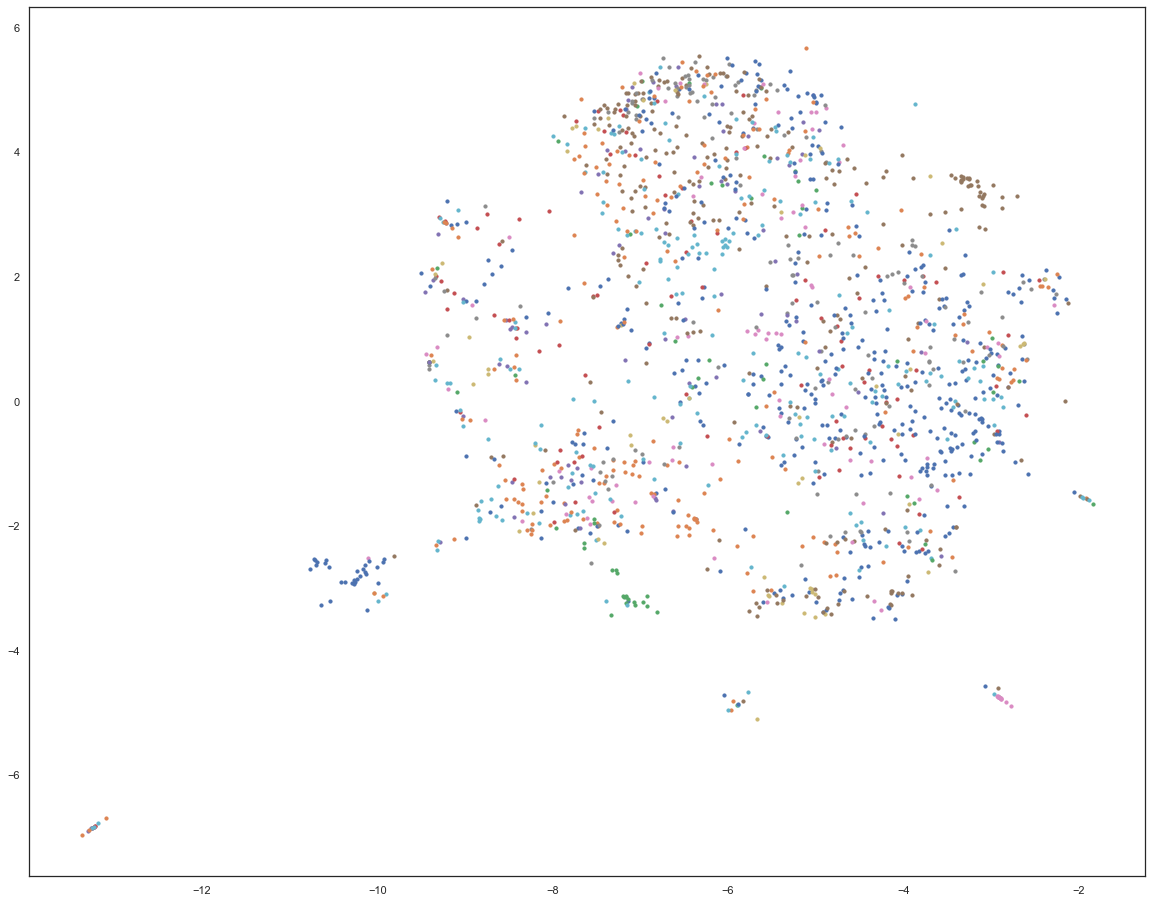

In [56]:
%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(20,16)})
 
for i in range(43):
    plt.scatter(v1_umap[i][:,0],v1_umap[i][:,1],s=10 )

In [145]:
clustered_sentence_umap_v1=[]
clustered_sentence_umap_c1=[]
sentences1=[]
for c,v,g in zip(c1,v1_umap,ex):
    for cs,s,x in zip(c,v,g):
        clustered_sentence_umap_v1.append(list(s))
        clustered_sentence_umap_c1.append(cs['class'])
        sentences1.append(x)

In [146]:
clustered_sentence_umap_v2=[]
clustered_sentence_umap_c2=[]
sentences2=[]

for c,v,g in zip(c2,v2_umap,ex):
    for cs,s,x in zip(c,v,g):
        clustered_sentence_umap_v2.append(list(s))
        clustered_sentence_umap_c2.append(cs['class'])
        sentences2.append(x)

In [150]:
classified_sentences1=[]
for c,s in zip(clustered_sentence_umap_c1,sentences1):
    classified_sentences1.append([c,s])

sorted_sentences1 = sorted(classified_sentences1, key=lambda x: x[0])
 

In [182]:
for s in sorted_sentences1:
    if s[0]==28:
        print("==",s[1])

==  [7] Because of his father's job, the family moved frequently during Lithgow's childhood; he spent his childhood years in Yellow Springs, Ohio , where activist Coretta Scott King babysat him and his siblings; he spent his teenage years in Akron (living at Stan Hywet Hall ) [8] and Lakewood, Ohio .
==  When he was a child, Lithgow’s family moved to Ohio, where his father produced local Shakespeare festivals.
==  The Donald Trump campaign advisor died, age 77, in 2017 from hemophilia - a year after he resigned (with $40M) from the 'fair and balanced' network due to multiple sexual harassment allegations.
==  John moved frequently as a child, while his father founded and managed local and college theaters and Shakespeare festivals throughout the Midwest of the United States.
==  In his more recent work, often plays fathers and family men .
==  As a youth, John and his siblings were often babysat by Coretta Scott (later Coretta Scott King ) in Yellow Springs, Ohio.
==  He is just 12 yea

In [175]:
classified_sentences2=[]
for c,s in zip(clustered_sentence_umap_c2,sentences2):
    classified_sentences2.append([c,s])

sorted_sentences2 = sorted(classified_sentences2, key=lambda x: x[0])
 

In [185]:
 
with open('./sentence vectors/bert_sorted_classes.json', 'w') as f:
    json.dump(sorted_sentences2, f)
    
with open('./sentence vectors/word2vec_sorted_classes.json', 'w') as f:
    json.dump(sorted_sentences1, f)
 

In [183]:
subs='family moved frequently'
res=[i for i in sorted_sentences1 if subs in i[1]]
res

[[28,
  " [7] Because of his father's job, the family moved frequently during Lithgow's childhood; he spent his childhood years in Yellow Springs, Ohio , where activist Coretta Scott King babysat him and his siblings; he spent his teenage years in Akron (living at Stan Hywet Hall ) [8] and Lakewood, Ohio ."],
 [28,
  " [7] Because of his father's job, the family moved frequently during Lithgow's childhood; he spent his childhood years in Yellow\u2005Springs,\u2005Ohio , where activist Coretta\u2005Scott\u2005King babysat him and his siblings; he spent his teenage years in Akron (living at Stan\u2005Hywet\u2005Hall ) [8] and Lakewood,\u2005Ohio ."]]

In [168]:
sorted_sentences1[;,1]

SyntaxError: invalid syntax (<ipython-input-168-c76b5ad2815a>, line 1)

In [177]:
for s in sorted_sentences2:
    if s[0]==11:
        print("==",s[1])

==  [7] Because of his father's job, the family moved frequently during Lithgow's childhood; he spent his childhood years in Yellow Springs, Ohio , where activist Coretta Scott King babysat him and his siblings; he spent his teenage years in Akron (living at Stan Hywet Hall ) [8] and Lakewood, Ohio .
==  John's father was born in Puerto Plata, Dominican Republic, where .
==  Early life Lithgow was born into a theatrical family; his mother was an actress, and his father was a theatre producer.
==  When he was a child, Lithgow’s family moved to Ohio, where his father produced local Shakespeare festivals.
==  His parents raised Lithgow in a loving home that encouraged artistic self-expression and took a broad view of the world.
==  As a youth, Lithgow was passionate about painting and at age 16, he was actively involved with the Art Students League in New York.
==  John moved frequently as a child, while his father founded and managed local and college theaters and Shakespeare festivals t

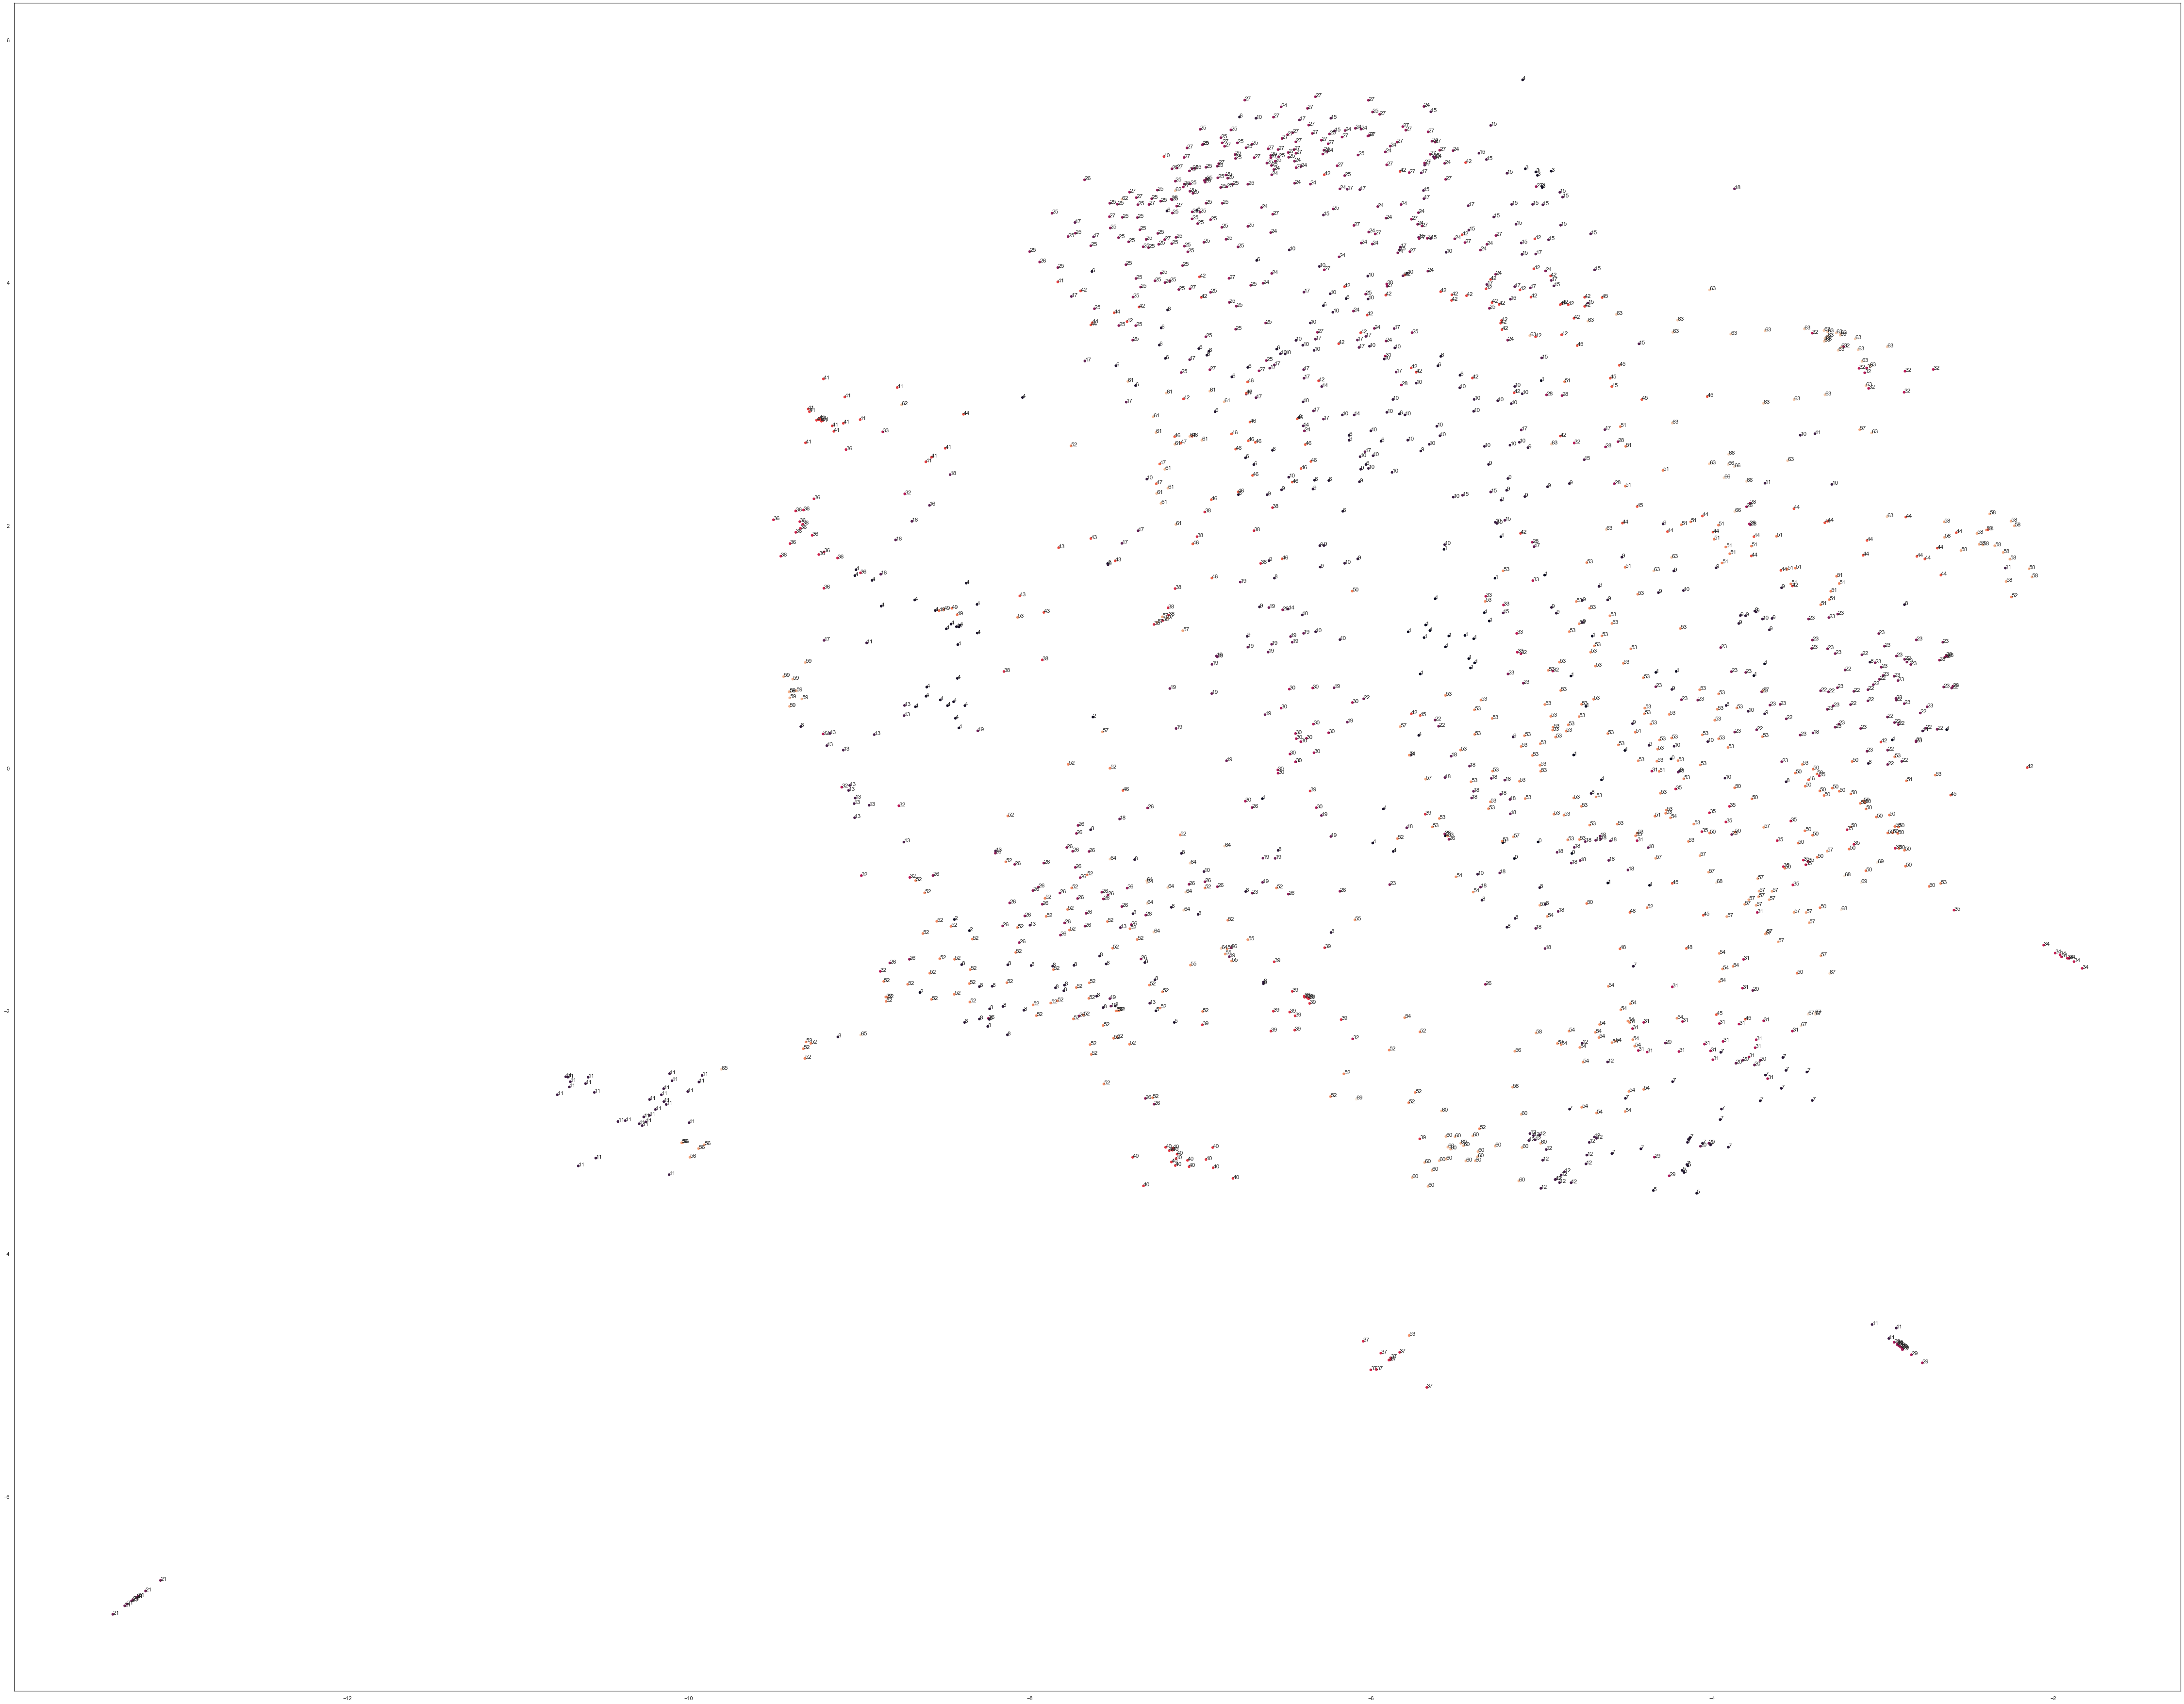

In [131]:
 %matplotlib inline
sns.set(style='white', rc={'figure.figsize':(80,64)})
 
x=[row[0] for row in clustered_sentence_umap_v1]
y=[row[1] for row in clustered_sentence_umap_v1]
s=
c=clustered_sentence_umap_c1

fig, ax = plt.subplots()
ax.scatter(x,y,c=c,s=20 )
for i, txt in enumerate(c):
    ax.annotate(txt, (x[i], y[i]))


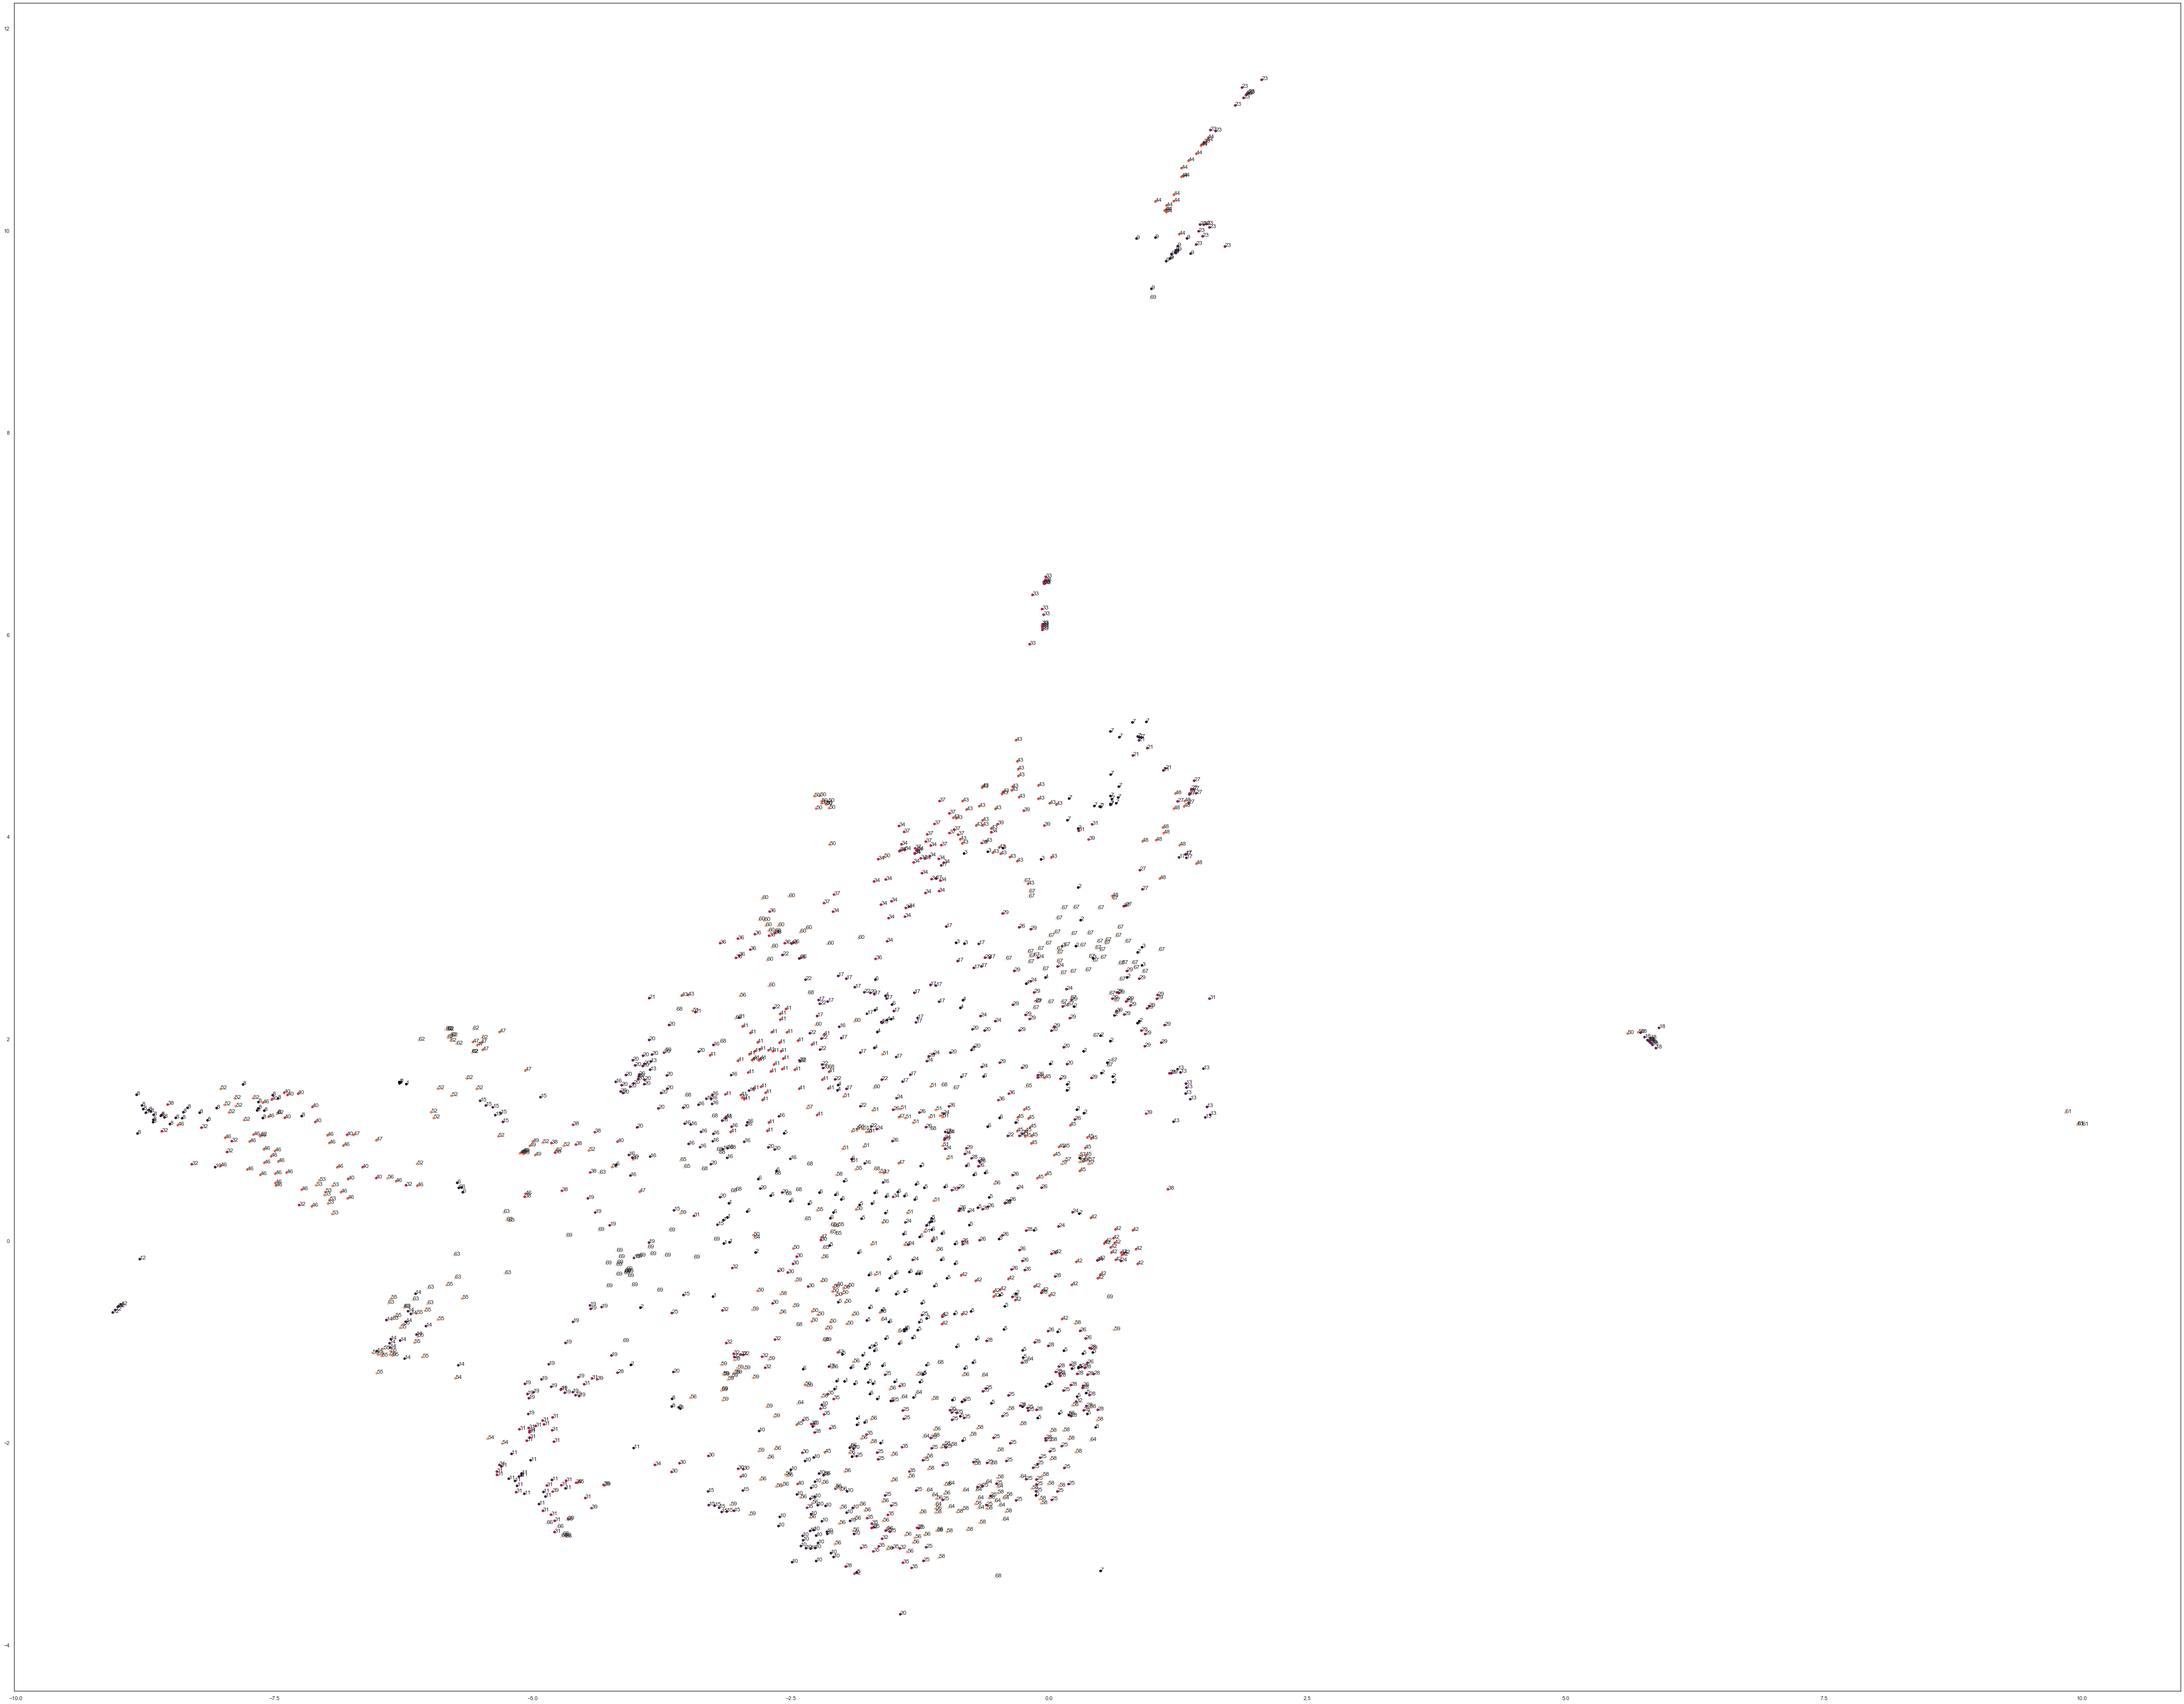

In [129]:
%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(80,64)})
 
x=[row[0] for row in clustered_sentence_umap_v2]
y=[row[1] for row in clustered_sentence_umap_v2]
c=clustered_sentence_umap_c2
fig, ax = plt.subplots()
ax.scatter(x,y,c=c,s=20 )
for i, txt in enumerate(c):
    ax.annotate(txt, (x[i], y[i]))